<a href="https://colab.research.google.com/github/AnandVishnuG/ImageCaptioningLSTM/blob/main/ImageCaptioningLSTMPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from matplotlib import pyplot as plt
from google.colab import files, drive
from tqdm import tqdm 
from PIL import Image
from pickle import dump, load
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Reshape
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from keras.preprocessing.image import ImageDataGenerator

import itertools
import numpy as np
import pandas as pd
import os


In [9]:
# Mount Google drive for accessing files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Create a dictionary of images as keys and each image's descriptions as items
def data_to_dictionary(data):
    descriptions = {}
    for idx, row in data.iterrows():
        if row["image"] not in descriptions:
            descriptions.setdefault(row["image"], []).append(row["caption"])
        else:
            descriptions[row["image"]].append(row["caption"])
    return descriptions
#converting dictionary to clean list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc    
# Converting captions to tokens
def list_to_tokens(desc_list):
  tokens = []
  for desc in desc_list:
    tokens.append(word_tokenize(desc))
  return tokens


In [11]:
# Read Captions file 
captions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/captions_clean.txt",encoding="cp1252")
# Create descriptions dictionary containing image keys and corresponding captions
descriptions = data_to_dictionary(captions)


In [15]:
from tensorflow.keras.applications import Xception

def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    
    # for word, index in tokenizer.items():
    #     if index == integer:
    #         return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # sequence = text_to_sequence(tokenizer, in_text)
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text.replace("start ","").replace(" end","").capitalize() + "."


#path = 'Flicker8k_Dataset/111537222_07e56d5a30.jpg'
max_length = 38
tokenizer_keras_reg = load(open("/content/tokenizer_keras_reg.p","rb"))
model_keras_reg = load_model('/content/model_9keras_reg.h5')
tokenizer_keras = load(open("/content/tokenizer_keras.p","rb"))
model_keras = load_model('/content/model_9keras.h5')

xception_model = Xception(include_top=False, pooling="avg")

# photo = extract_features("/content/drive/MyDrive/Colab Notebooks/data/Images/1000268201_693b08cb0e.jpg", xception_model)#/content/drive/MyDrive/Colab Notebooks/data/Images/111537222_07e56d5a30.jpg
# img = Image.open("/content/drive/MyDrive/Colab Notebooks/data/Images/1000268201_693b08cb0e.jpg")

# description = generate_desc(model, tokenizer, photo, max_length)
# print("\n\n")
# print(description)
# plt.imshow(img)

1/1 [==============================] - 2s 2s/step



Prediction Keras Tokenizer: A man in a black shirt and a black shirt and a black shirt and a black shirt and a black shirt and a black shirt and a black shirt and a black shirt and a black shirt.
Prediction Keras Tokenizer Regularized: A man in a blue shirt is standing on a trampoline.
Prediction NLTK Tokenizer: A man in a black shirt is sitting on a bench with a man in a black shirt.
Prediction_rotation: A man in a red shirt and a red shirt is standing on a bench.
Prediction_shift: A man in a red shirt is standing on a bench.
Prediction_color: A man in a red shirt is standing on a bench.
Prediction_brightness: A woman in a black shirt is sitting on a red and white toy.
BLEU_keras: 0.0744444851664066
BLEU_keras_reg: 0.26538891991860186
BLEU_NLTK: 0.22853003221274276
BLEU_rotation: 0.249716836996329
BLEU_shift: 0.3214262466586357
BLEU_color: 0.3214262466586357
BLEU_brightness: 0.2726023599451356


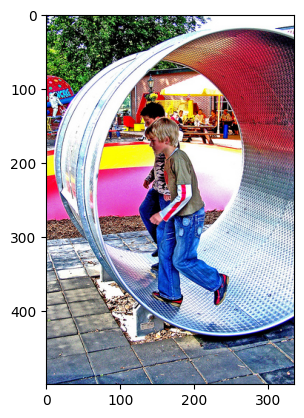

1/1 [==============================] - 0s 400ms/step



Prediction Keras Tokenizer: A boy in a red shirt is jumping on a swing.
Prediction Keras Tokenizer Regularized: A boy jumps off a skateboard.
Prediction NLTK Tokenizer: A boy in a red shirt is jumping on a skateboard.
Prediction_rotation: A man in a red shirt is jumping in a red shirt.
Prediction_shift: A man in a black shirt and a helmet is riding a bike.
Prediction_color: A man in a red shirt is jumping on a skateboard.
Prediction_brightness: A man in a red shirt is jumping off a rock over a large tree.
BLEU_keras: 0.6371417179298761
BLEU_keras_reg: 0.2690215385313614
BLEU_NLTK: 0.6657914268967432
BLEU_rotation: 0.5962464737438627
BLEU_shift: 0.6127424270649229
BLEU_color: 0.6315462781949357
BLEU_brightness: 0.6303323218303154


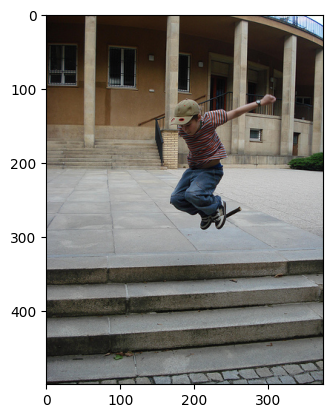

1/1 [==============================] - 0s 395ms/step



Prediction Keras Tokenizer: A black dog is running on a field.
Prediction Keras Tokenizer Regularized: A dog is running through a field.
Prediction NLTK Tokenizer: A dog is running through a field.
Prediction_rotation: A dog is running through a field.
Prediction_shift: A dog is running through the grass.
Prediction_color: A dog is running through a field.
Prediction_brightness: A dog is running through the water.
BLEU_keras: 0.350014328641615
BLEU_keras_reg: 0.4392867899002782
BLEU_NLTK: 0.4392867899002782
BLEU_rotation: 0.4392867899002782
BLEU_shift: 0.5248602544488351
BLEU_color: 0.4392867899002782
BLEU_brightness: 0.5313014625339164


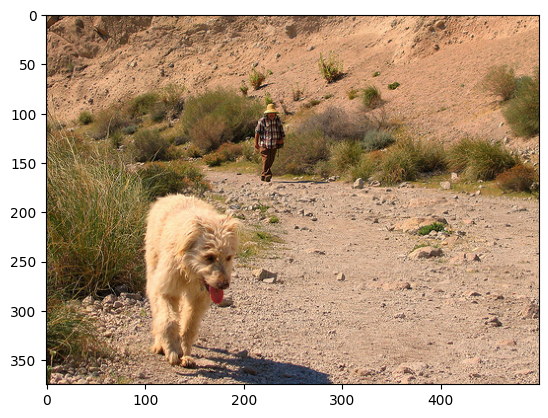

1/1 [==============================] - 1s 745ms/step



Prediction Keras Tokenizer: A boy in a blue shirt is jumping into a pool.
Prediction Keras Tokenizer Regularized: A boy in a blue shirt is jumping into the air.
Prediction NLTK Tokenizer: A boy in a blue shirt is jumping into a pool.
Prediction_rotation: A boy in a red shirt is running on a beach.
Prediction_shift: A boy in a blue shirt is jumping in a pool.
Prediction_color: A boy in a red shirt is jumping into a pool.
Prediction_brightness: A young girl in a blue shirt is jumping into a pool of a blue slide.
BLEU_keras: 0.4184986454849939
BLEU_keras_reg: 0.42664404151716084
BLEU_NLTK: 0.4184986454849939
BLEU_rotation: 0.4818132147519206
BLEU_shift: 0.48456661359939873
BLEU_color: 0.45474171637401056
BLEU_brightness: 0.26474167962044326


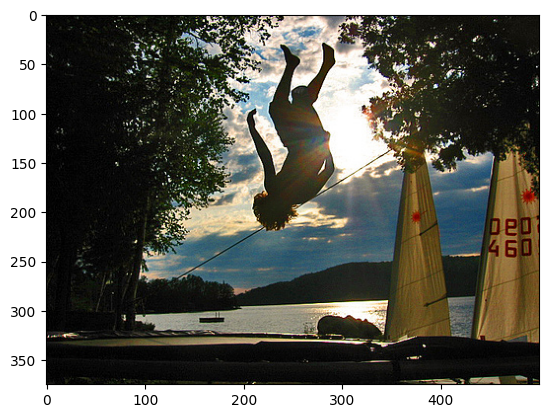

1/1 [==============================] - 0s 397ms/step



Prediction Keras Tokenizer: A man in a black shirt is jumping over a wave.
Prediction Keras Tokenizer Regularized: A man in a red shirt is jumping over a ramp.
Prediction NLTK Tokenizer: A man in a black shirt is jumping over a wave.
Prediction_rotation: A man in a red shirt is standing on a beach.
Prediction_shift: A man is standing on a snowy hill.
Prediction_color: A man in a red shirt is riding a snowboard in a snow.
Prediction_brightness: A man in a red jacket is standing on a snowy hill.
BLEU_keras: 0.44501529169627746
BLEU_keras_reg: 0.416350721110587
BLEU_NLTK: 0.44501529169627746
BLEU_rotation: 0.47720765911359486
BLEU_shift: 0.5195216394947828
BLEU_color: 0.36818725764423754
BLEU_brightness: 0.42324984447482583


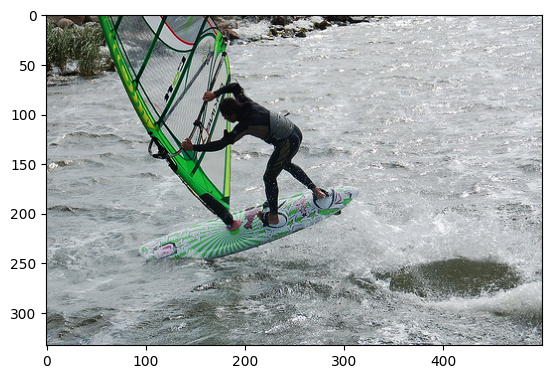

In [21]:
from pandas import read_csv
import random
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score

from tensorflow.keras.applications import Xception

def extract_features(filename, model):
        try:
            image = Image.open(filename)
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

smooth_func = SmoothingFunction().method1

file = open('/content/drive/MyDrive/Colab Notebooks/data/Flickr_8k.testImages.txt',"r")
test_images = []
prediction_nltk = load(open("/content/predictions_nltk.p","rb"))
prediction_rotation = load(open("/content/predictions_aug2_rotation.p","rb"))
# feature_rotation = load(open("/content/features_aug2_rotation.p","rb"))
prediction_shift = load(open("/content/predictions_aug2_shift.p","rb"))
# feature_shift
prediction_color = load(open("/content/predictions_aug2_color (1).p","rb"))
# feature_color = load(open("/content/features_aug2_color.p","rb"))
prediction_brightness = load(open("/content/predictions_aug2_brightness.p","rb"))
# feature_brightness = load(open("/content/features_aug2_brightness.p","rb"))
for filename in file.read().split("\n")[:-1]:
    test_images.append(filename)
# model = load_model("models\\model2_19.h5")
xception_model = Xception(include_top=False, pooling="avg")
for i in range(0,5):
    rand_idx = random.randint(0, len(test_images)-1)
    fname = "/content/drive/MyDrive/Colab Notebooks/data/Images/" + test_images[rand_idx]
    photo = extract_features (fname, xception_model)
    img = Image.open(fname)
    disc_keras = generate_desc(model_keras, tokenizer_keras, photo, max_length)
    disc_keras_reg = generate_desc(model_keras_reg, tokenizer_keras_reg, photo, max_length)
    disc_nltk = prediction_nltk[rand_idx].replace("start ", "").replace(" end",".").capitalize()
    disc_rotation = prediction_rotation[rand_idx]
    disc_shift = prediction_shift[rand_idx]
    disc_color = prediction_color[rand_idx]
    disc_brightness = prediction_brightness[rand_idx]
    print("\n\n")
    # Prediction
    print("Prediction Keras Tokenizer: {}".format(disc_keras))
    print("Prediction Keras Tokenizer Regularized: {}".format(disc_keras_reg))
    print("Prediction NLTK Tokenizer: {}".format(disc_nltk))
    print("Prediction_rotation: {}".format(disc_rotation))
    print("Prediction_shift: {}".format(disc_shift))
    print("Prediction_color: {}".format(disc_color))
    print("Prediction_brightness: {}".format(disc_brightness))
    
    # Description
    score_keras = sentence_bleu(descriptions[test_images[rand_idx]], disc_keras, smoothing_function=smooth_func)
    score_keras_reg = sentence_bleu(descriptions[test_images[rand_idx]], disc_keras_reg, smoothing_function=smooth_func)
    score_nltk = sentence_bleu(descriptions[test_images[rand_idx]], disc_nltk, smoothing_function=smooth_func)
    score_rotation = sentence_bleu(descriptions[test_images[rand_idx]], disc_rotation, smoothing_function=smooth_func)
    score_shift = sentence_bleu(descriptions[test_images[rand_idx]], disc_shift, smoothing_function=smooth_func)
    score_color = sentence_bleu(descriptions[test_images[rand_idx]], disc_color, smoothing_function=smooth_func)
    score_brightness = sentence_bleu(descriptions[test_images[rand_idx]], disc_brightness, smoothing_function=smooth_func)
    
    print("BLEU_keras: {}".format(score_keras))  
    print("BLEU_keras_reg: {}".format(score_keras_reg))  
    print("BLEU_NLTK: {}".format(score_nltk))  
    print("BLEU_rotation: {}".format(score_rotation))  
    print("BLEU_shift: {}".format(score_shift))  
    print("BLEU_color: {}".format(score_color))  
    print("BLEU_brightness: {}".format(score_brightness))  
    plt.figure()
    plt.imshow(img)
    plt.show(block=True)